In [ ]:
import gensim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
import pickle
import yfinance as yf

from gensim.models import KeyedVectors
from datetime import datetime

sns.set_style("whitegrid")

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/ML_EPFL_Project/returns.pkl")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML_EPFL_Project/returns.pkl'

In [ ]:
tick_num = df.ticker.nunique()
obs_num = df.shape[0]
date_min = df.date.min()
date_max = df.date.max()

print("Number of observations: {}".format(obs_num))
print("Number of tickers: {}".format(tick_num))
print("Min date: {}".format(date_min.strftime("%b %d %Y")))
print("Max date: {}".format(date_max.strftime("%b %d %Y")))

Number of observations: 15843
Number of tickers: 2510
Min date: Nov 03 2017
Max date: Feb 23 2023


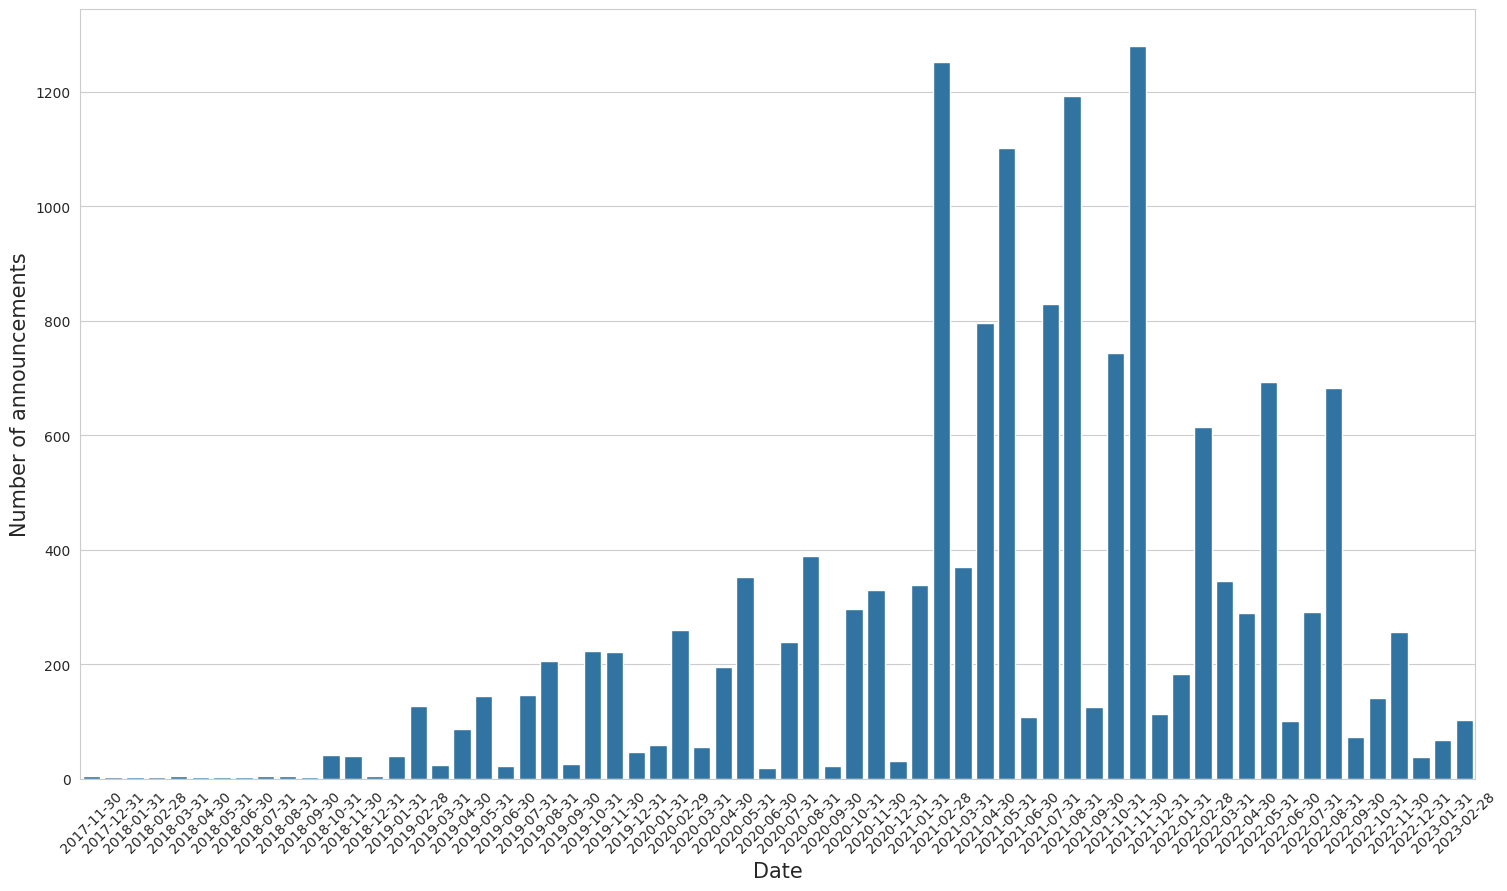

In [ ]:
monthly_stats = df.set_index('date').resample("M").count()

plt.figure(figsize=(18, 10))
sns.barplot(monthly_stats, x="date", y="exchange")

plt.xticks(rotation=45)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of announcements", fontsize=15)
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q')

quarterly_counts = df.groupby(['year', 'quarter']).size()
quarterly_counts.tail()

In [ ]:
quarterly_stats = quarterly_counts.reset_index()

plt.figure(figsize=(18, 10))
sns.barplot(data=quarterly_stats, x='quarter', y=0)

plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of announcements', fontsize=15)
plt.show()

In [ ]:
df.daily_r.describe()

count    15804.000000
mean        -0.000200
std          0.068067
min         -0.762240
25%         -0.029968
50%          0.000374
75%          0.030105
max          0.784337
Name: daily_r, dtype: float64

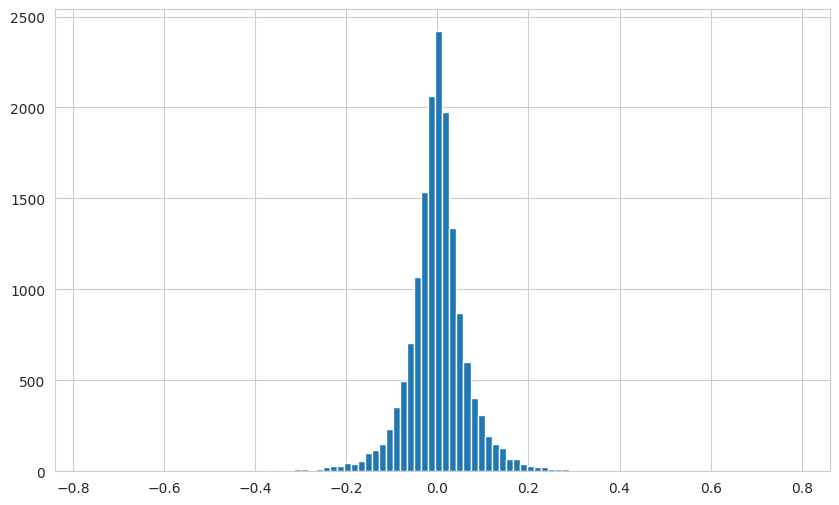

In [ ]:
plt.figure(figsize=(10, 6))
df.daily_r.hist(bins=100)
plt.show()

In [ ]:
df.weekly_r.describe()

count    15804.000000
mean         0.003139
std          0.111511
min         -0.818240
25%         -0.051388
50%          0.002807
75%          0.054691
max          1.182692
Name: weekly_r, dtype: float64

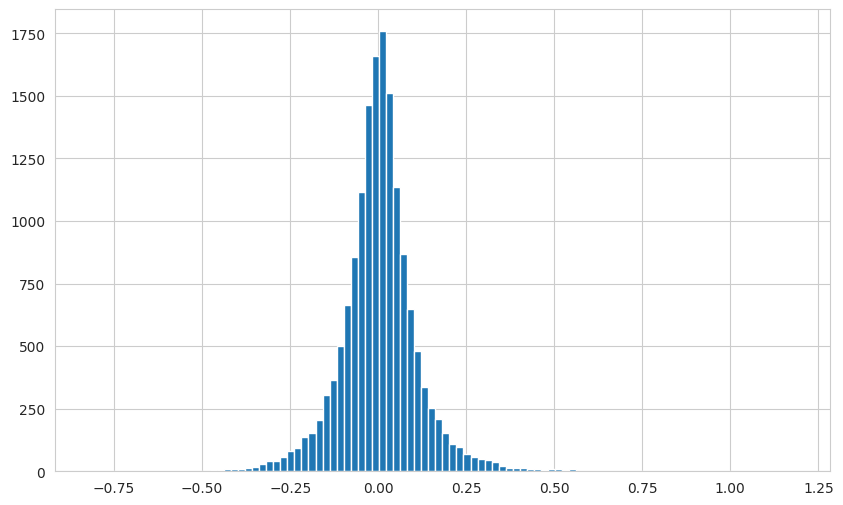

In [ ]:
plt.figure(figsize=(10, 6))
df.weekly_r.hist(bins=100)
plt.show()

In [ ]:
df.monthly_r.describe()

count    15804.000000
mean        -0.001632
std          0.186194
min         -0.858929
25%         -0.094429
50%         -0.001311
75%          0.083239
max          5.565916
Name: monthly_r, dtype: float64

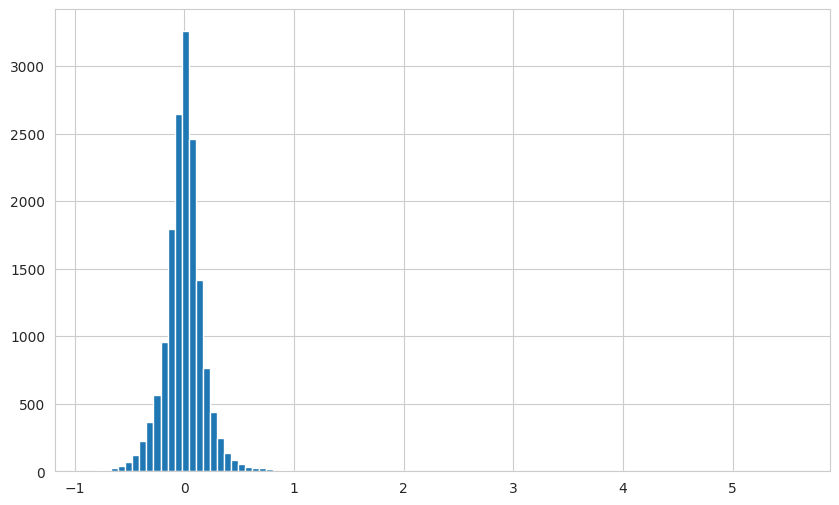

In [ ]:
plt.figure(figsize=(10, 6))
df.monthly_r.hist(bins=100)
plt.show()

In [ ]:
X = df['daily_r'].values.reshape(-1, 1)
y = df['weekly_r'].values

regression_model = LinearRegression().fit(X, y)
y_pred = regression_model.predict(X)

coefficients = regression_model.coef_
intercept = regression_model.intercept_


fig, axes = plt.subplots(1, 3, figsize=(18, 7))

axes[0].plot(X, y_pred, color='red', label= f'weekly_r ~ {coefficients[0]:.2f} daily_r + {intercept:.2f}') #'Linear Regression')
axes[0].scatter(df['daily_r'], df['weekly_r'])
axes[0].set_xlabel('Daily Return')
axes[0].set_ylabel('Weekly Return')
axes[0].set_title('Daily Return vs. Weekly Return')
axes[0].legend()

#sns.regplot(x=df['daily_r'], y=df['monthly_r'], data=df, ax=axes[1], color='red')
axes[1].scatter(df['daily_r'], df['monthly_r'])
axes[1].set_xlabel('Daily Return')
axes[1].set_ylabel('Monthly Return')
axes[1].set_title('Daily Return vs. Monthly Return')

#sns.regplot(x=df['weekly_r'], y=df['monthly_r'], data=df, ax=axes[2], color='red')
axes[2].scatter(df['weekly_r'], df['monthly_r'])
axes[2].set_xlabel('Weekly Return')
axes[2].set_ylabel('Monthly Return')
axes[2].set_title('Weekly Return vs. Monthly Return')

plt.show()

In [ ]:
test = pd.read_pickle("/content/drive/MyDrive/ML_EPFL_Project/test.pkl")
train = pd.read_pickle("/content/drive/MyDrive/ML_EPFL_Project/train.pkl")

merged_df = pd.concat([test, train], ignore_index=True)
merged_df.head()

In [ ]:
merged_df['word_count'] = merged_df['transcript'].apply(lambda x: len(x.split()))
merged_df.head()

plt.figure(figsize=(10, 6))
merged_df['word_count'].hist(bins=100)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
#plt.title('Distribution of Number of Words in Announcements')
plt.show()